## Keeping an Open Mind ... Or Not

**Text:** The Rocky Horror Picture Show <br><br>
**Model:** Schelling Segregation Model (https://ccl.northwestern.edu/netlogo/models/Segregation) <br><br>
**Python Implementation:** Example code from class (https://github.com/dbabichenko/dnid/blob/main/Procedurally-generated%20narrative/SchellingModel.ipynb) I also had some additional help with the code for parsing and implementing my rules outside of class. <br>
<br>
**Description:** <br> 
>    This model focuses on the relationship between the open minded and closed minded characters in *The Rocky Horror Picture Show*. The agents include two groups of characters: open minded and closed minded characters. For the purposes of this model, each character will have 5 neighbors, 2 of which much be in the same group as them. The most significant modifications I made to the model were the addition of two new rules which relate to the addition of attributes for each character. First, I'll explain the attributes. Each character has a set of three attributes: innocence, unconventionalism, and offendability. I ranked these attributes on a scale of 1 to 3 where 1 means the character does not represent that attribute well and 3 means that attribute is extremely present in that character. Then the rules come in. If two characters are neighbors and they are both very easily offended (rank 3 for offendability), they will fight, and one of them will die. The other rule looks at the first two attributes of neighbors of opposite groups (innocence and unconventionalism), and if those two attributes exact opposites (the closed minded character ranks 3,1 for innocence and unconventionalism while the open minded character ranks 1,3 for those attributes) then the closed minded character will switch over to the open minded group. Also, if the characters both rank 2 for innocnce and unconventionalism, the closed minded character will become open minded. <br>
    The biggest change I made to the text itself was how I did not include certain characters either because they did not play a significant role in the narrative or they did not have many lines. Also, since this is a musical, there are lots of instances where characters double up in lines. I chose to ignore these lines because I thought it would be too difficult to parse. Also, those lines were not necessary for the purposes of this model. 
    


## Importing Libraries

In [1]:
import random
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

## Creating the two Different Groups

In [2]:

closed_minded= {
    'BRAD' : [],
    'JANET' : [],
    'DR SCOTT' : [],
    'ROCKY' : [],
    'NARRATOR' : [],  
}
open_minded= {
    'RIFF RAFF' : [],
    'MAGENTA' : [],
    'FRANK' : [],
    'COLUMBIA' : [],
    'EDDIE':[]
}


## Attributes
In order: innocence, unconventionalism, easily offended/offendability
(1-3 ranking,1 being not very, 3 being very)

In [3]:
cm_att= {
    'BRAD' : [3,1,1], 
    'JANET' : [3,2,3], 
    'DR SCOTT' : [2,2,1], 
    'ROCKY' : [3,3,2], 
    'NARRATOR' : [2,1,1], 
}
om_att = {
    'RIFF RAFF' : [2,2,1], 
    'MAGENTA' : [2,2,1], 
    'FRANK' : [1,3,3], 
    'COLUMBIA' : [1,2,3], 
    'EDDIE':[1,2,1]    
}

## Parsing the Text

In [4]:

rhps=open('rhps.txt')
rhps_text=rhps.read()

import re

for character, statements in closed_minded.items():
    # Find ALL positions where the character name appears in text
    positions = [m.start() for m in re.finditer(character + '\n', rhps_text)]
    
    # Iterate through the list of positions and grab a statement associated with 
    # the character whose name appears at that position
    for pos in positions:
        start = pos
        temp=rhps_text[start:]
        stop=temp.find('\n\n')
        statement=temp[:stop]
        closed_minded[character].append(statement)

        
for character, statements in open_minded.items():
    # Find ALL positions where the character name appears in text
    positions = [m.start() for m in re.finditer(character + '\n', rhps_text)]
    
    # Iterate through the list of positions and grab a statement associated with 
    # the character whose name appears at that position
    for pos in positions:
        start = pos
        temp=rhps_text[start:]
        stop=temp.find('\n\n')
        statement=temp[:stop]
        open_minded[character].append(statement)



## Agent Rules

In [5]:



# Each agent in the model is represented by an Agent object
class Agent:
    # Class constructor - initializes all the properties of an Agent object
    def __init__(self, agent_type, agent_name, agent_statement, 
                 agent_innocence, agent_unconventionalism, agent_offendability):
        self.type = agent_type
        self.name = agent_name
        self.statement = agent_statement.strip().replace('\n', ' ') # A bit of cleaning...
        self.innocence = agent_innocence
        self.unconventionalism = agent_unconventionalism
        self.offendability = agent_offendability
        self.draw_location()
    
   
    # Randomly place an agent on the virtual "grid"
    def draw_location(self):
        self.location = random.uniform(0, 1), random.uniform(0, 1)

        
    # Compute the Euclidean distance between self and other agent.
    def get_distance(self, other):
        a = (self.location[0] - other.location[0])**2
        b = (self.location[1] - other.location[1])**2
        return sqrt(a + b)


            

    ##HERE IS WHERE MY ADDED RULES START
    
 #if the self and the neighbor we are comparting to are both easily offended, it randomly desicdes which one will die
    def kill(self, neighbors, agents):
        self_cast=str(self.name)
        n_count=0
        for n in neighbors:
            # They will only kill eachother if they are in opposite groups
            if self.type!=n.type:
                n_cast=str(n.name)
                
                #The characters only have a chance at killing eachother 
                #if they are both easily offended aka 3 for offendability
                if self.offendability==3 and self.offendability == n.offendability:
                    who_dies = random.choice([1,2])
                    if who_dies==1:         
                        print("Unfortunately, "+self_cast+" has killed "+n_cast+
                        " because they could not see eye to eye. :(\n")
                        print(n_cast+"'s final words were: "+n.statement+"\n")
                        open_minded.pop(n.name)
                        agents.remove(n)
                        neighbors.pop(n_count)
                        success=True
                        break
                    elif who_dies == 2:
                        print("Unfortunately, "+n_cast+" has killed "+self_cast+
                        " because they could not see eye to eye. :(\n")
                        print(self_cast+"'s final words were: "+self.statement+"\n")
                        closed_minded.pop(self.name)
                        agents.remove(self)
                        success=True
                        break
                    break
                break
            break

                           

    
    #if self is part of closed minded their first two attributes are the same as the neighbor we are comparing to, the closed 
    # minded character, self, will switch over to become part of the open minded group
    def switch(self, neighbors):
        self_cast=str(self.name)
        
        for n in neighbors:
            if self.type!=n.type:
                n_cast=str(n.name)
                
                #Using the idea of 'opposites attract', if the two characters have opposite rankings for innocence and
                # unconventionalism, the closed minded character will be compelled to become more openminded since their ideas
                # were challeneged
                if (self.innocence==3 and self.unconventionalism==1) and (n.innocence==1 and n.unconventionalism==3 ):
                    self.type = n.type
                    print(n_cast+ " has enlightened "+self_cast+", and "+self_cast+" is now part of the open minded crew. :)\n")
                    print(self_cast+" would like to share a few words about this experience... "+self.statement+"\n")            
                    break
                
                #if two characters both rank a 2 for innocence and unconventionalism, the closed-minded character
                #will switch to open minded because they are more likely to have a rational conversation that changes their mind
                elif ((self.innocence==2 and self.unconventionalism==2) and 
                    (self.innocence==n.innocence and self.unconventionalism==n.unconventionalism)):
                    self.type=n.type
                    print("Because "+self_cast+" and "+n_cast+" share the same characteristics while not being extreme, they" 
                    " had a lovely discussion, and "+self_cast+" has decided to change and become more open minded. :)\n")
                    print(self_cast+" would like to share a few words about this experience... "+self.statement+"\n")
                    break
                    
   
    ##ADDED RULLES END

    
    
    # Determine if an agent is happy
    # True if sufficient number of nearest neighbors are of the same type.
    
    def happy(self, agents):
        distances = []
        # distances is a list of pairs (d, agent), where d is distance from
        # agent to self
        for agent in agents:
            if self != agent:
                distance = self.get_distance(agent)
                distances.append((distance, agent))
        
        # == Sort from smallest to largest, according to distance == #
        distances.sort()
        
        # == Extract the neighboring agents == #
        neighbors = [agent for d, agent in distances[:num_neighbors]]
        # Unlike in the original model code, we will save the list
        # of nearest neighbors as a property of each agent - this way
        # each agent always knows its nearest neighbors
        self.neighbors = neighbors
        
        #implementing the added rules
        
        #These rules only run if the 'self' is part of the closed_minded group
        if self.type==0:
            self.switch(neighbors)
            self.kill(neighbors, agents)

        # == Count how many neighbors have the same type as self == #
        num_same_type = sum(self.type == agent.type for agent in neighbors)
        return num_same_type >= require_same_type


    
    # Update agent's position.
    # If agent is not happy, then randomly choose new locations until happy.
    def update(self, agents):
        while not self.happy(agents):
            self.draw_location()

## Assigning Agent Parameters

In [6]:
num_of_type_0=len(closed_minded.items())
num_of_type_1=len(open_minded.items())
num_neighbors= 5
require_same_type=2
agents=[]



for character_name, statement_list in closed_minded.items():
    agent_name = character_name
    agent_statement = random.choice(statement_list)
    
    agent_innocence = cm_att[character_name][0]
    agent_unconventionalism = cm_att[character_name][1]
    agent_offendability= cm_att[character_name][2]
    
    agent=Agent(0, agent_name, agent_statement, agent_innocence, agent_unconventionalism, agent_offendability)
    agents.append(agent)


for character_name, statement_list in open_minded.items():
    agent_name = character_name
    agent_statement = random.choice(statement_list)
    
    agent_innocence = om_att[character_name][0]
    agent_unconventionalism = om_att[character_name][1]
    agent_offendability = om_att[character_name][2]
    
    agent=Agent(1, agent_name, agent_statement, agent_innocence, agent_unconventionalism, agent_offendability)
    agents.append(agent)



## Looping

In [7]:
count = 1
# ==  Loop until none wishes to move == #
while True:
    print('Entering loop: ', count,'\n')
    count += 1
    no_one_moved = True
    for agent in agents:
        old_location = agent.location
        agent.update(agents)
        if agent.location != old_location:
            no_one_moved = False
    if no_one_moved:
        break

print('Converged. Terminating.')

Entering loop:  1 

FRANK has enlightened BRAD, and BRAD is now part of the open minded crew. :)

BRAD would like to share a few words about this experience... BRAD You mean you're going to kill him? What's his crime?

Unfortunately, FRANK has killed JANET because they could not see eye to eye. :(

JANET's final words were: JANET We're trapped.

Entering loop:  2 

Converged. Terminating.


In [8]:
# Let's see where all of our agents are in regards to each other
for agent in agents: # Iterate through the list of agents
    print(agent.name + " neighbors: ")
    for n in agent.neighbors: # For each agent, iterate through its neighbors
        print('\t' + n.name)

BRAD neighbors: 
	FRANK
	DR SCOTT
	ROCKY
	EDDIE
	NARRATOR
DR SCOTT neighbors: 
	BRAD
	FRANK
	EDDIE
	ROCKY
	NARRATOR
ROCKY neighbors: 
	FRANK
	BRAD
	NARRATOR
	DR SCOTT
	COLUMBIA
NARRATOR neighbors: 
	FRANK
	ROCKY
	BRAD
	MAGENTA
	DR SCOTT
RIFF RAFF neighbors: 
	COLUMBIA
	MAGENTA
	EDDIE
	ROCKY
	FRANK
MAGENTA neighbors: 
	COLUMBIA
	RIFF RAFF
	ROCKY
	FRANK
	NARRATOR
FRANK neighbors: 
	ROCKY
	BRAD
	NARRATOR
	DR SCOTT
	COLUMBIA
COLUMBIA neighbors: 
	RIFF RAFF
	MAGENTA
	ROCKY
	EDDIE
	FRANK
EDDIE neighbors: 
	BRAD
	DR SCOTT
	RIFF RAFF
	COLUMBIA
	ROCKY


## Visualization of the Connections

In [9]:
import networkx as nx
G=nx.Graph()
G

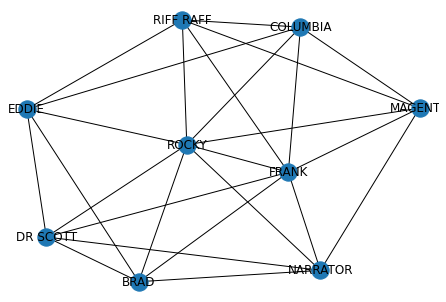

In [10]:
for agent in agents:
    G.add_node(agent.name)

for agent in agents:
    for n in agent.neighbors:
        G.add_edge(agent.name,n.name)
nx.draw(G,with_labels=True)